# Notebook to explore clean data


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/Home/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Wind generation

In [3]:
filename = 'ERCOT wind data.csv'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

In [6]:
ercot = pd.read_csv(fullpath, index_col=0)

In [7]:
ercot.head()

,"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW","Wind Output, % of Installed","Wind Output, % of Load",1-hr MW change,1-hr % change
2007-01-01 00:00:00,30428.0,2790.0,1074.0,38.494624,3.529644,NaN,NaN
2007-01-01 01:00:00,30133.0,2790.0,922.6,33.068100,3.061760,-151.4,-14.096834
2007-01-01 02:00:00,29941.0,2790.0,849.2,30.437276,2.836245,-73.4,-7.955777
2007-01-01 03:00:00,29949.0,2790.0,1056.3,37.860215,3.526996,207.1,24.387659
2007-01-01 04:00:00,30248.0,2790.0,837.1,30.003584,2.767456,-219.2,-20.751680


Distribution of wind output as % of load

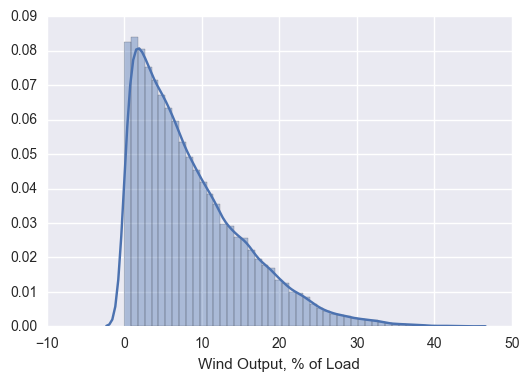

In [8]:
sns.distplot(ercot['Wind Output, % of Load'])

How does this distribution change over time? Need to set a year column.

In [17]:
ercot['year'] = pd.to_datetime(ercot.index).year

The figure below shows a clear shift in the amount of generation from wind over time. In 2007 it was rarely above 10%, and the lowest bin is ~40% of the total. The distribution flattens considerably by 2010, and by 2013 starts creeping above 30% of total load.

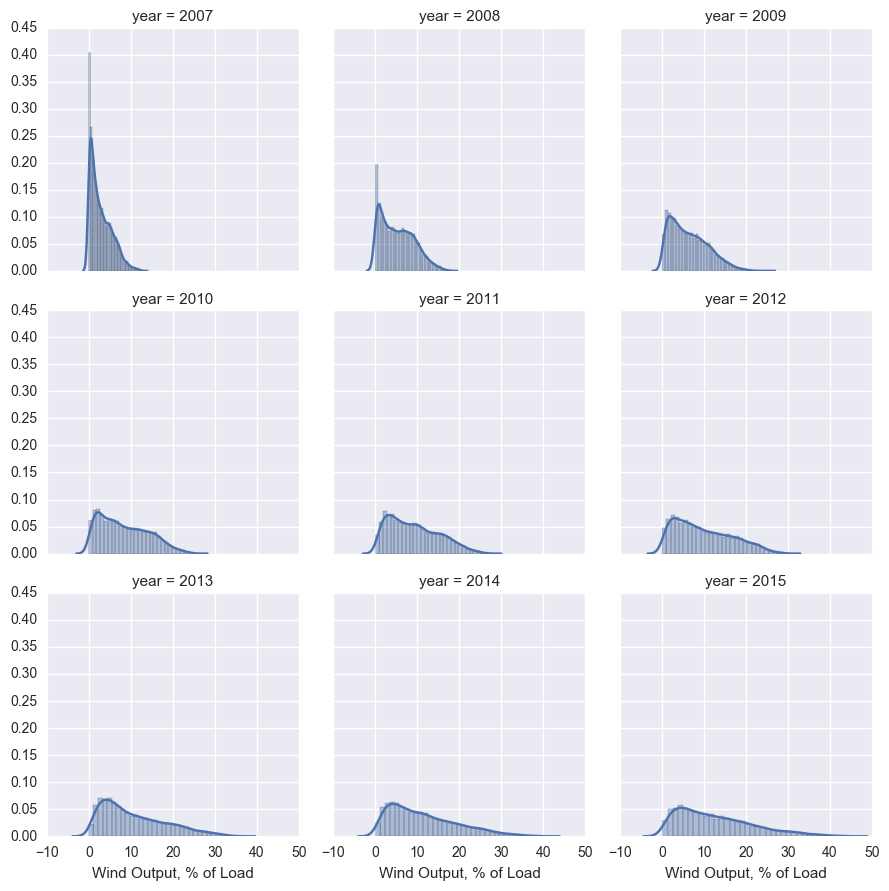

In [19]:
g = sns.FacetGrid(ercot, col='year', col_wrap=3)
g.map(sns.distplot, 'Wind Output, % of Load')